# **Data Sciences Salary**

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [38]:
url='jobs_in_data.csv'
df=pd.read_csv(url,sep=',')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [39]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [41]:
## forecasting jerarquico
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

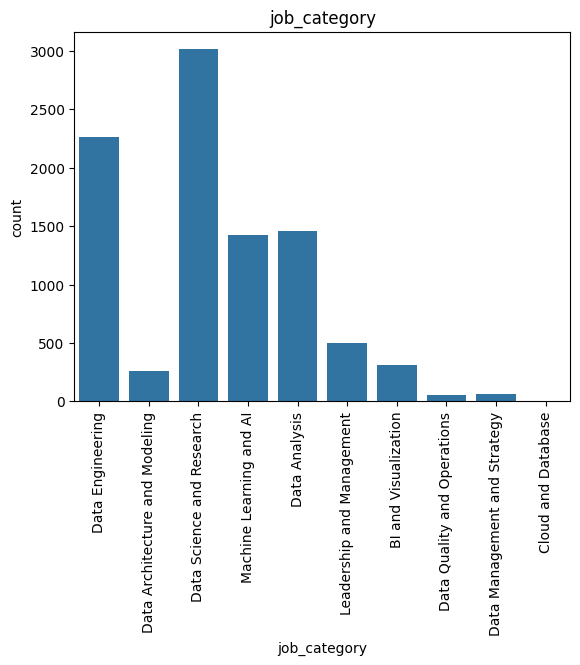

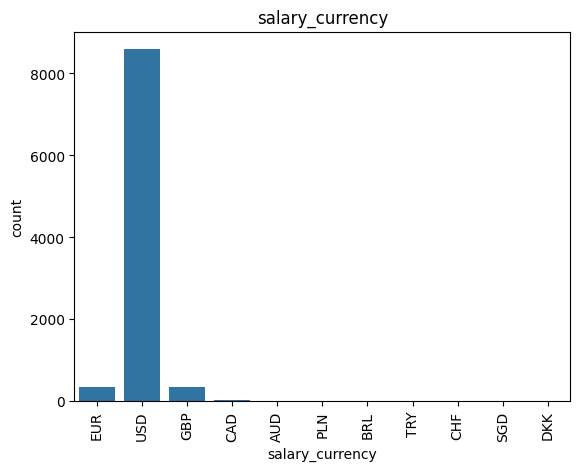

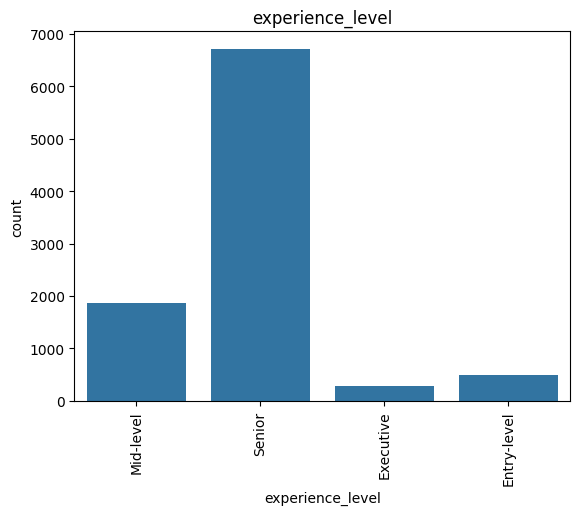

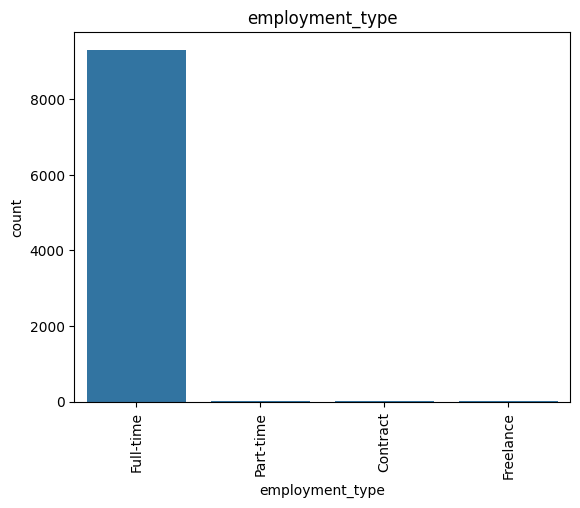

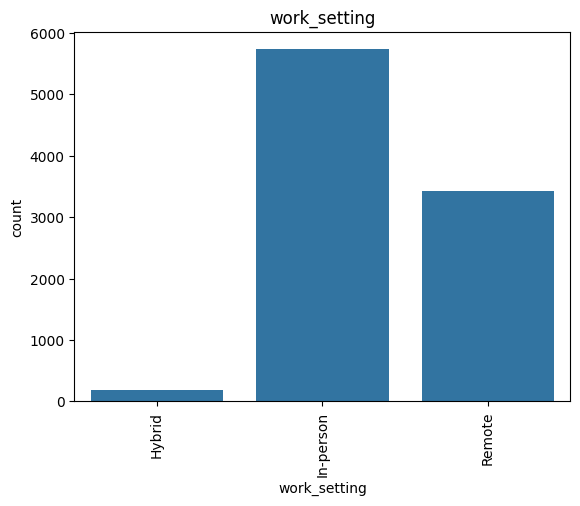

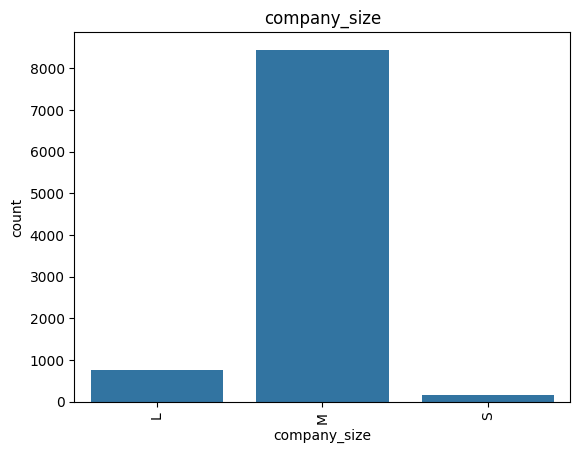

In [42]:
cat=df.select_dtypes(include='object').columns
cat=['job_category', 'salary_currency',
       'experience_level', 'employment_type', 'work_setting','company_size']

for i in cat:
       sns.countplot(data=df,x=i)
       plt.title(i)
       plt.xticks(rotation='vertical')
       plt.show()

In [43]:
df['job_title'].value_counts()

job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64

In [44]:
df['salary_in_usd']

0        95012
1       186000
2        81800
3       212000
4        93300
         ...  
9350    165000
9351    412000
9352    151000
9353    105000
9354    100000
Name: salary_in_usd, Length: 9355, dtype: int64

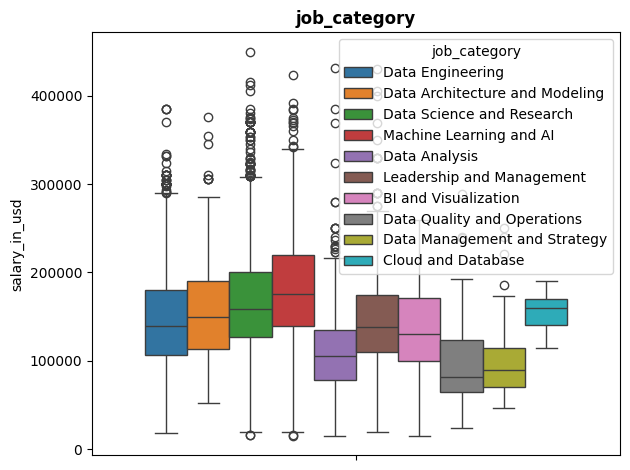

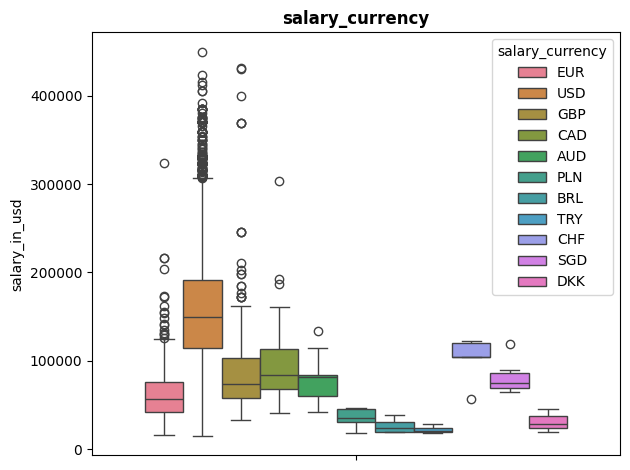

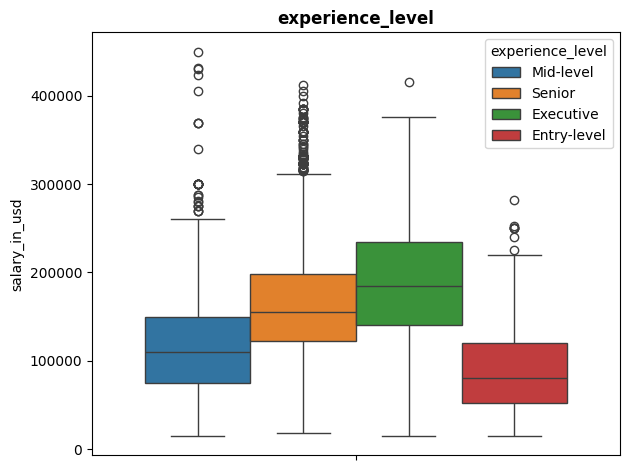

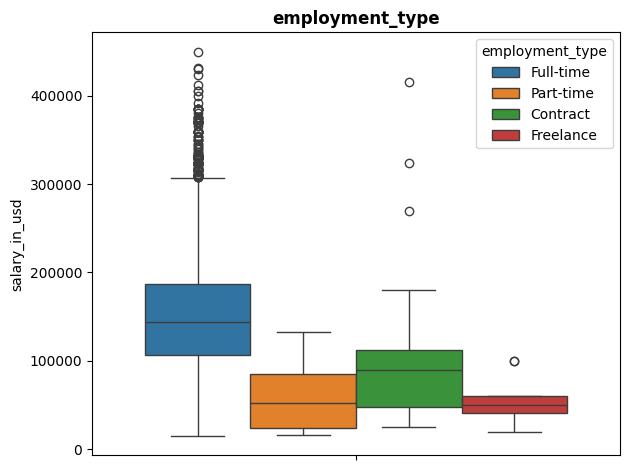

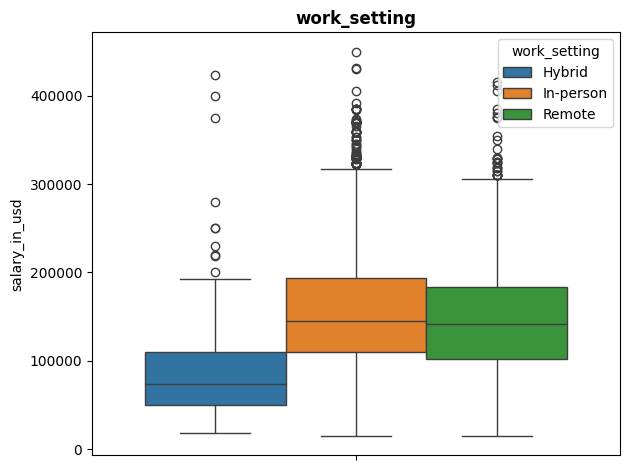

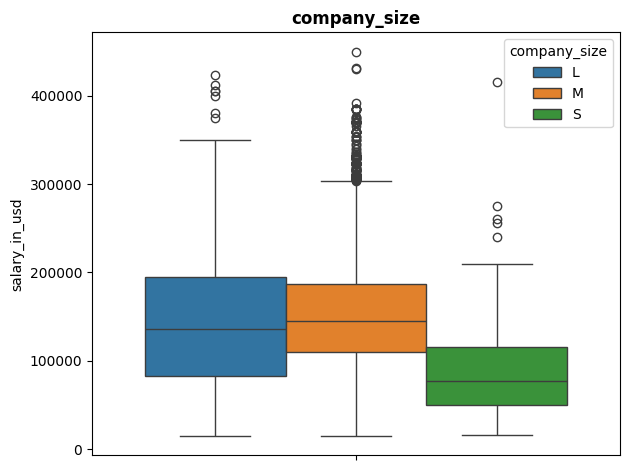

In [45]:
for i in cat:
    sns.boxplot(data=df,y='salary_in_usd',hue=i)
    plt.title(i,fontsize=12,weight='bold')
    plt.tight_layout()
    plt.show()

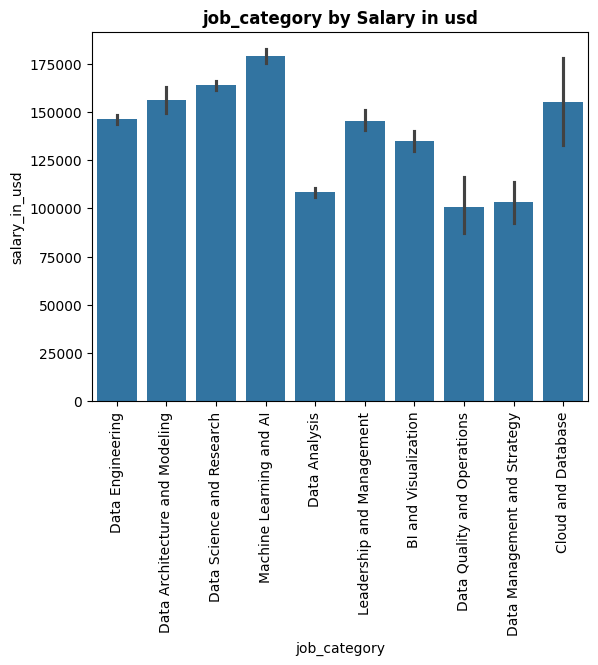

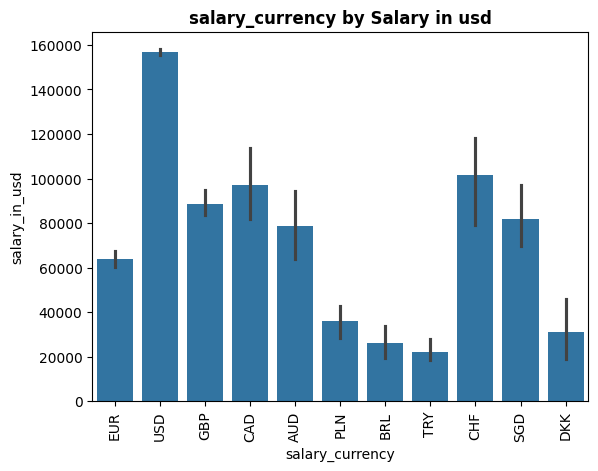

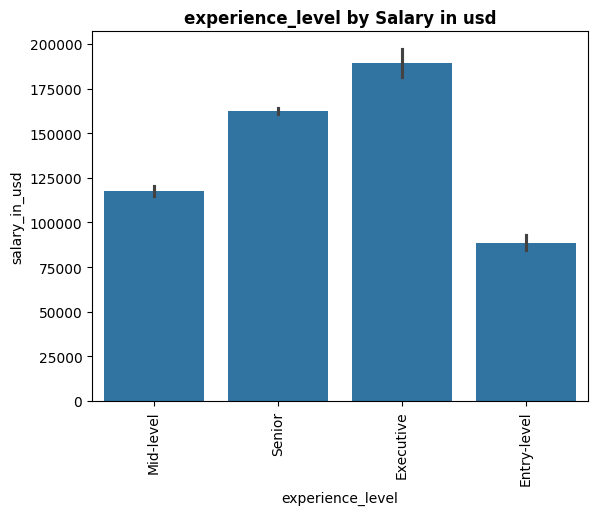

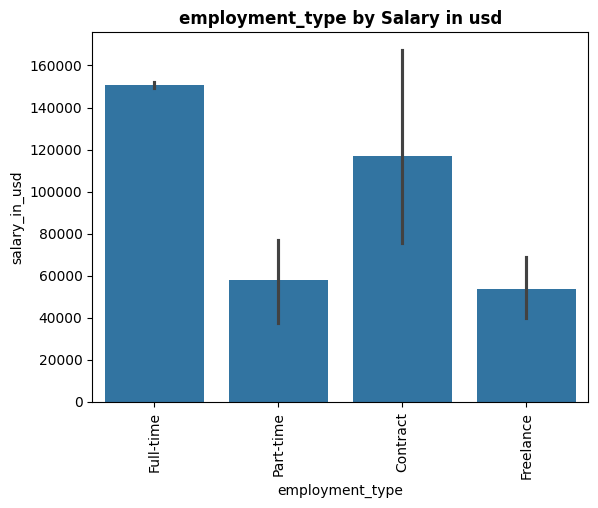

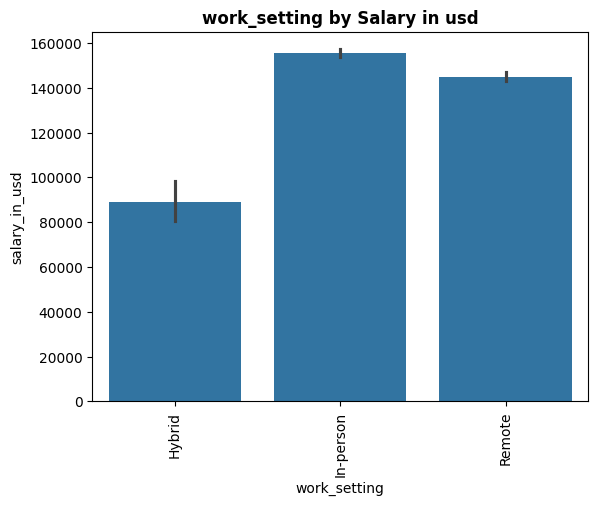

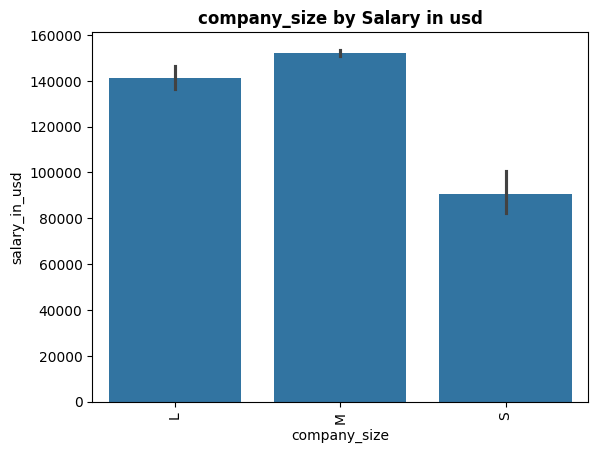

In [46]:
for i in cat:
    sns.barplot(data=df,x=i,y='salary_in_usd')
    plt.title(f'{i} by Salary in usd',weight='bold')
    plt.xticks(rotation='vertical')
    plt.show()

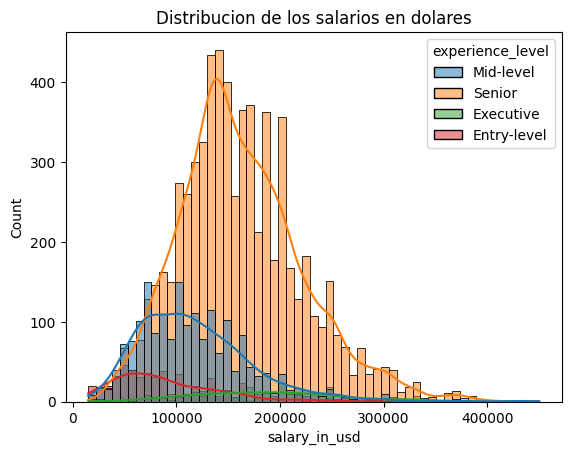

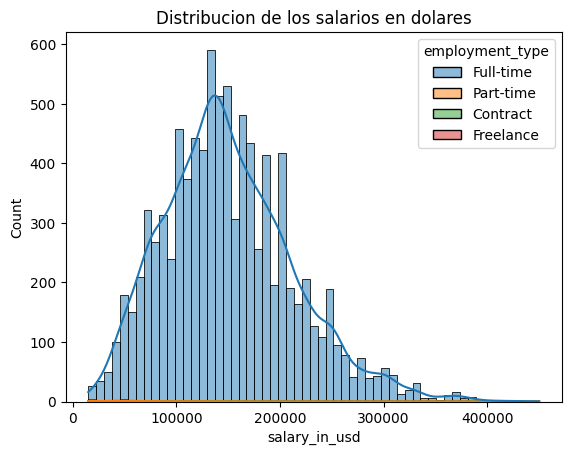

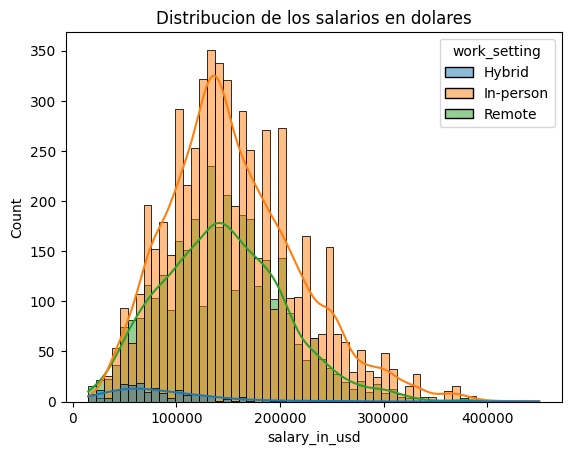

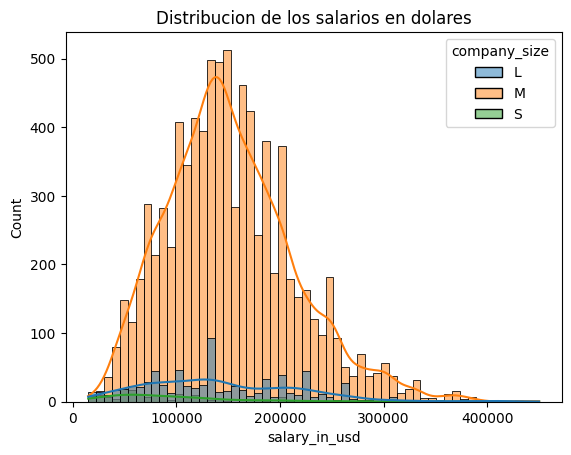

In [47]:
cat_1=[ 'experience_level',
 'employment_type',
 'work_setting',
 'company_size']
for i in cat_1:
    sns.histplot(data=df,x='salary_in_usd',kde=True, hue=i)
    plt.title('Distribucion de los salarios en dolares',fontsize=12)
    plt.show()

In [48]:
df_salary=df[['salary_in_usd','work_year']].groupby('work_year').mean()
df_salary=pd.DataFrame(df_salary)
df_salary

,salary_in_usd
work_year,
2020,105878.859155
2021,106483.644670
2022,135467.501836
2023,155132.591708


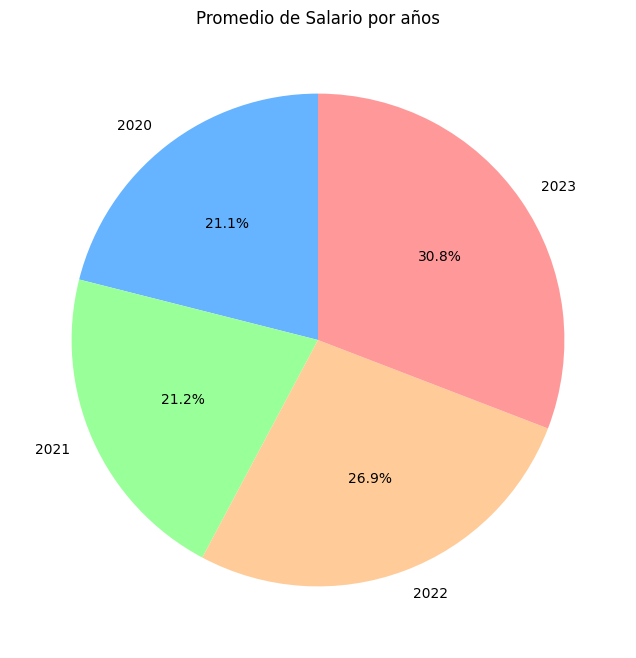

In [49]:
# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(df_salary['salary_in_usd'], labels=df_salary.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Promedio de Salario por años')
plt.show()

In [50]:
df_salary.columns

Index(['salary_in_usd'], dtype='object')

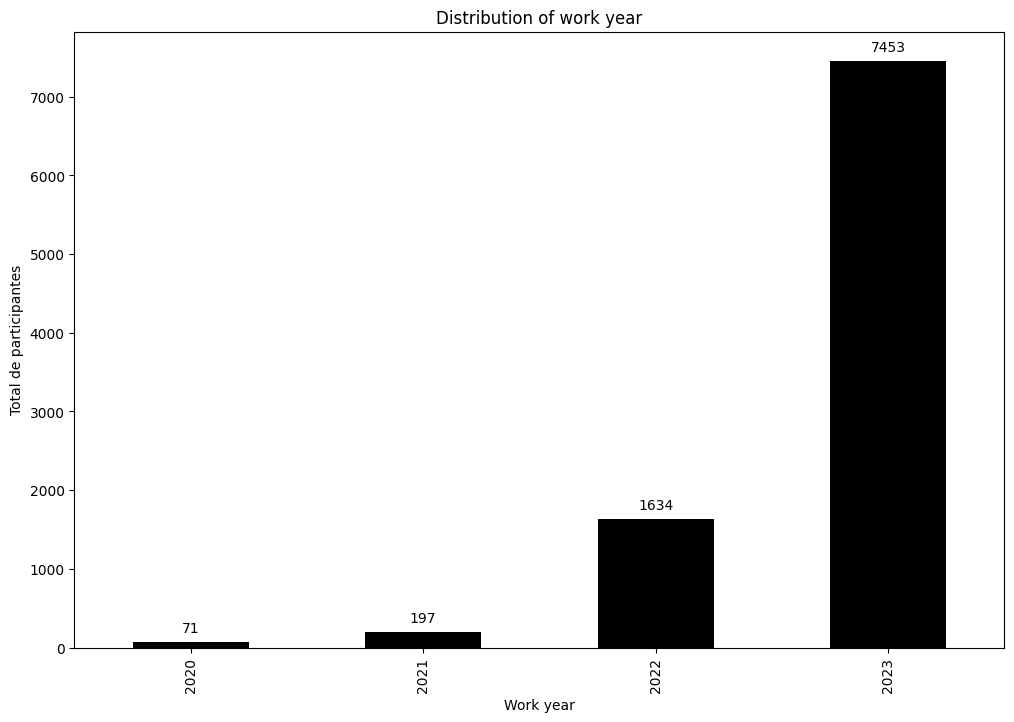

In [51]:
import matplotlib.pyplot as plt

work_year = df['work_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
ax = work_year.plot(kind='bar', color='black')

# Agrega etiquetas a cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of work year')
plt.xlabel('Work year')
plt.ylabel('Total de participantes')
plt.show()


Tal como se evidencia en el grafico de barras el numero de trabajadores relacionado al data science aumento, en el año 2023. En pocas palabras la demanda de data science es la mayor de todas en comparacion a los demas años.

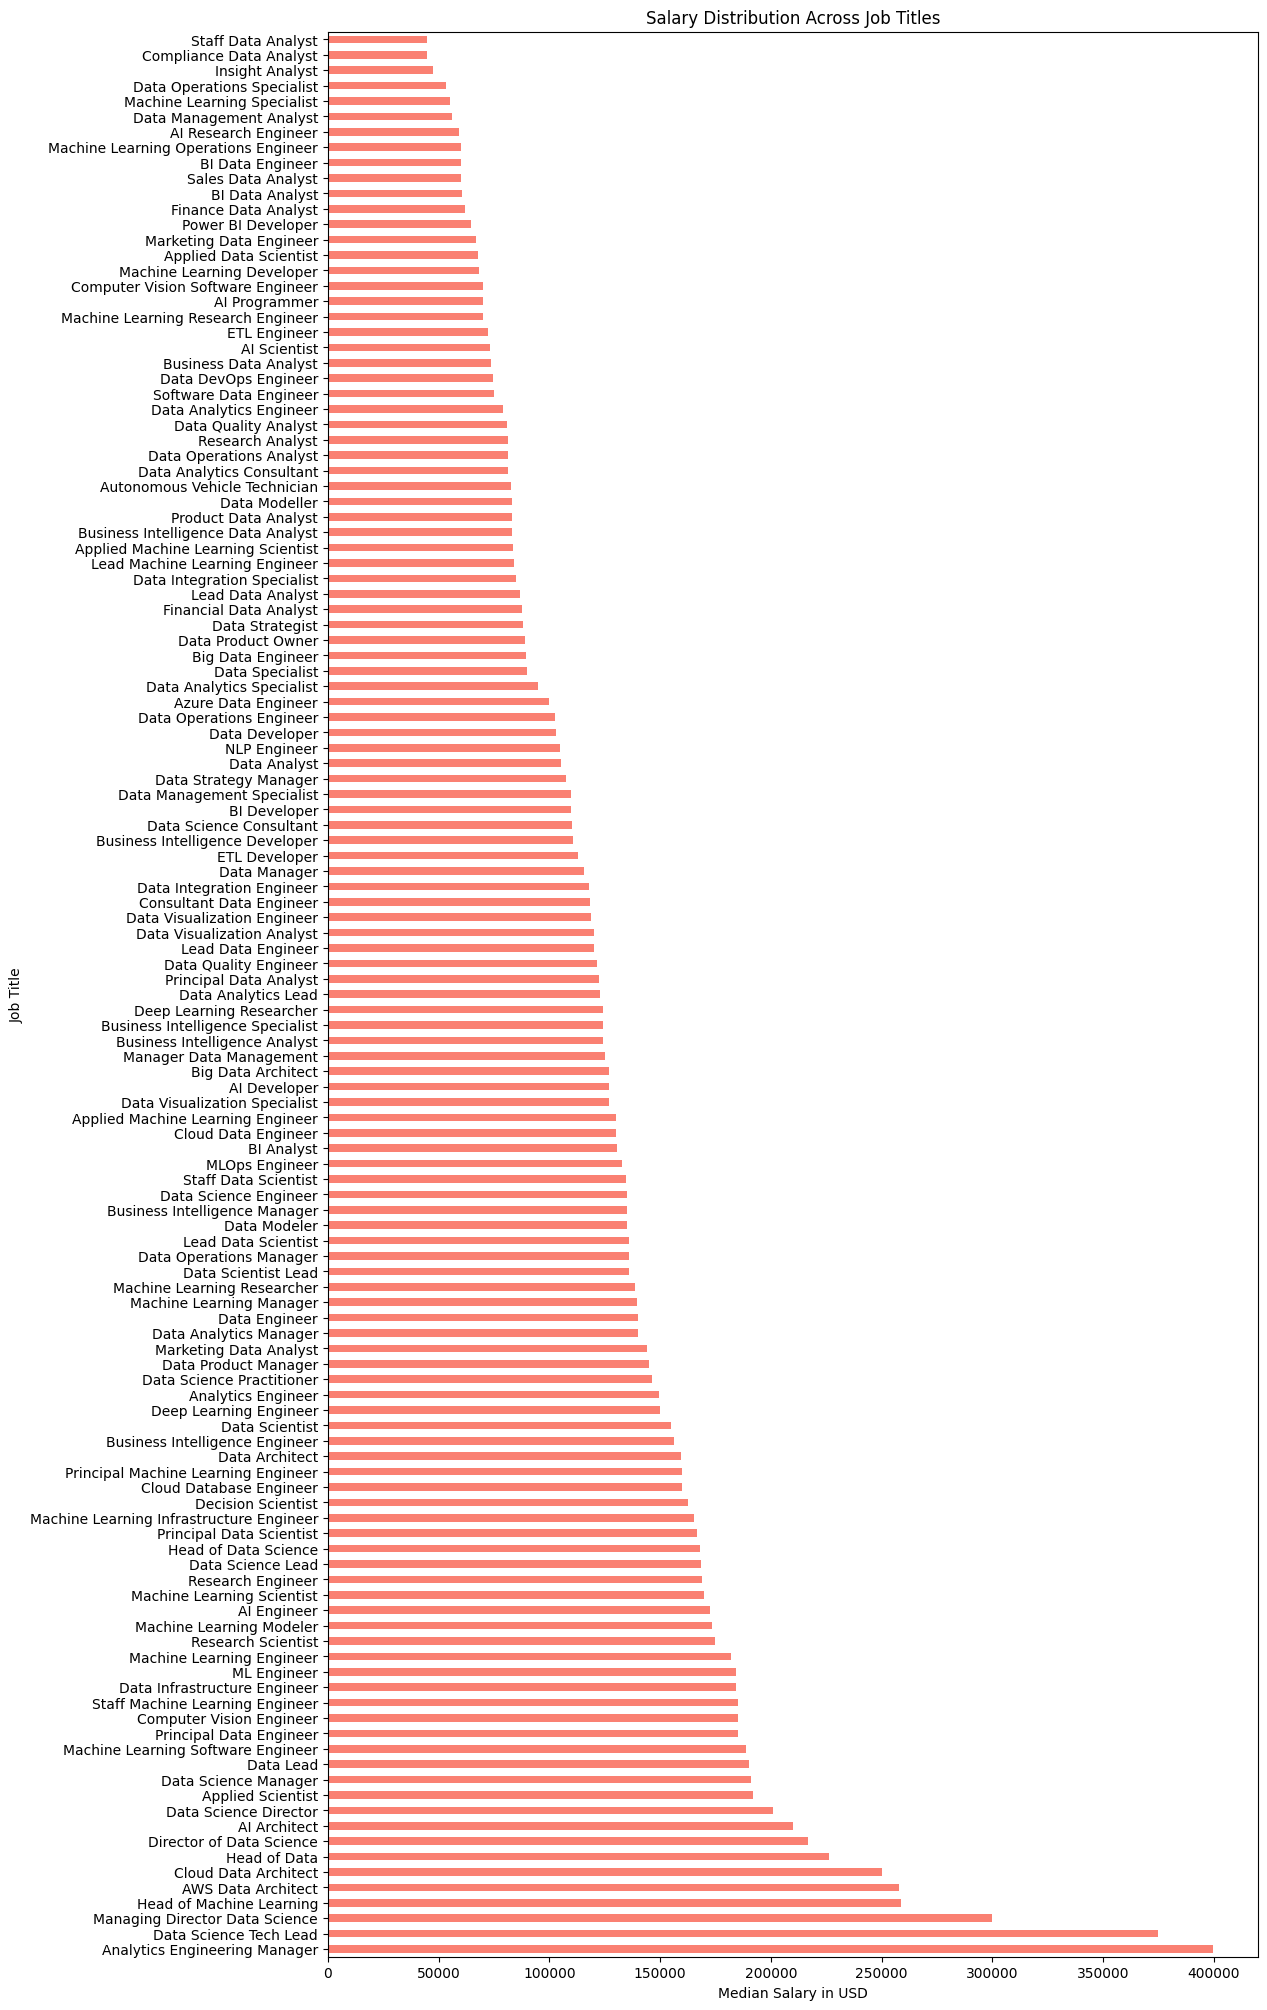

In [52]:
# analizar los datos categoricos mas extensos
job_title_salary=df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)
plt.figure(figsize=(12,25))
job_title_salary.plot(kind='barh',color='salmon')
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Median Salary in USD')
plt.ylabel('Job Title')
plt.show()

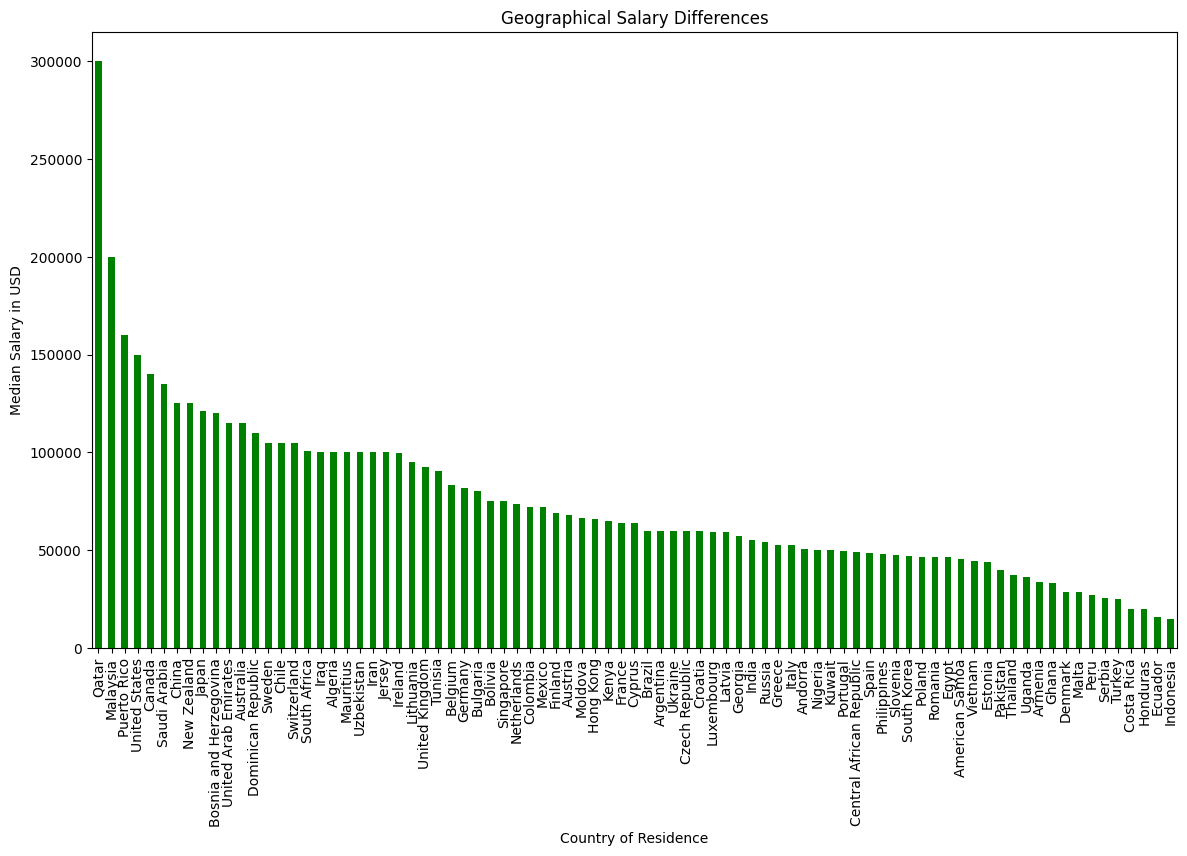

In [53]:
salary_residence=df.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
salary_residence.plot(kind='bar', color='green')
plt.title('Geographical Salary Differences')
plt.xlabel('Country of Residence')
plt.ylabel('Median Salary in USD')
plt.show()

In [54]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [55]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Figure size 1200x800 with 0 Axes>

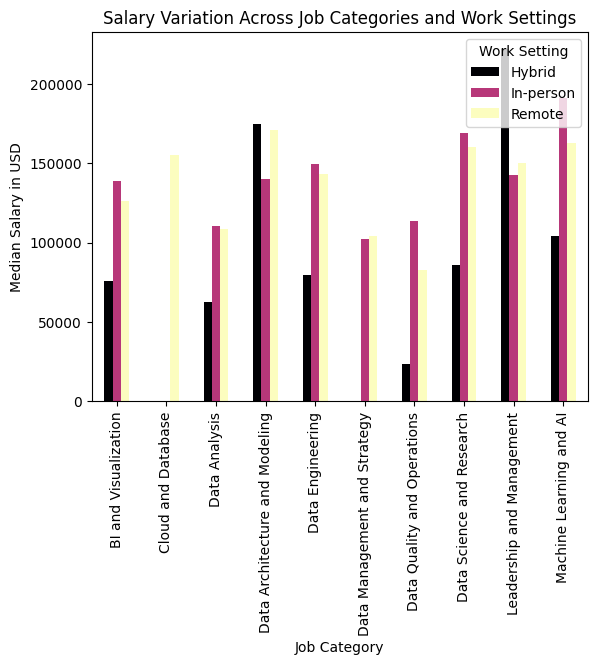

In [56]:
salary_category=df.groupby(['job_category', 'work_setting'])['salary_in_usd'].mean().unstack()
plt.figure(figsize=(12,8))
salary_category.plot(kind='bar',colormap='magma')
plt.title('Salary Variation Across Job Categories and Work Settings')
plt.xlabel('Job Category')
plt.ylabel('Median Salary in USD')
plt.legend(title='Work Setting', loc='upper right')
plt.show()

In [57]:
salary_experience=df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().unstack()
salary_experience

employment_type,Contract,Freelance,Full-time,Part-time
experience_level,,,,
Entry-level,64605.5,75000.0,89571.359833,57476.416667
Executive,416000.0,NaN,188653.853571,NaN
Mid-level,91321.2,44511.0,117956.867639,59424.666667
Senior,159361.0,55000.0,162421.997612,NaN


<Figure size 1400x800 with 0 Axes>

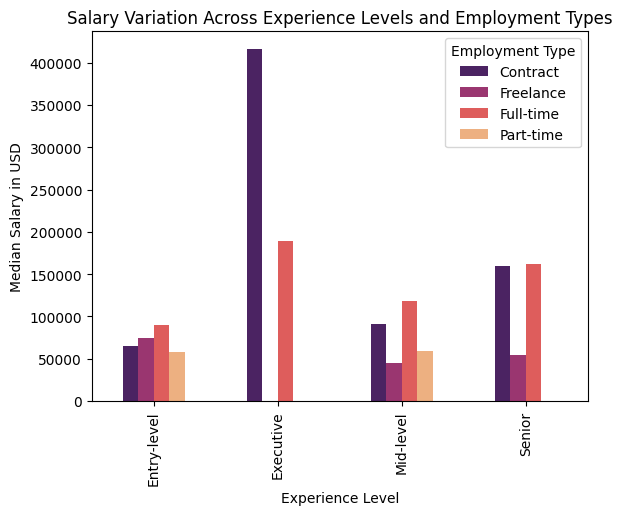

In [58]:
plt.figure(figsize=(14, 8))
salary_experience.plot(kind='bar', colormap='flare_r')
plt.title('Salary Variation Across Experience Levels and Employment Types')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary in USD')
plt.legend(title='Employment Type', loc='upper right')
plt.show()

In [59]:
salary_by_category_and_work_setting=df.groupby(['job_category', 'work_setting'])['salary_in_usd'].mean().unstack()
salary_by_category_and_work_setting

work_setting,Hybrid,In-person,Remote
job_category,,,
BI and Visualization,76000.000000,138706.761062,126280.232558
Cloud and Database,NaN,NaN,155000.000000
Data Analysis,62444.896552,110291.003778,108376.777603
Data Architecture and Modeling,174851.500000,139954.758065,170680.586466
Data Engineering,79533.903226,149541.637980,142995.879708
Data Management and Strategy,NaN,102445.567568,104210.416667
Data Quality and Operations,23753.000000,113778.823529,82806.900000
Data Science and Research,86040.925000,169128.239037,160164.724624
Leadership and Management,221464.000000,142191.659443,149776.568182


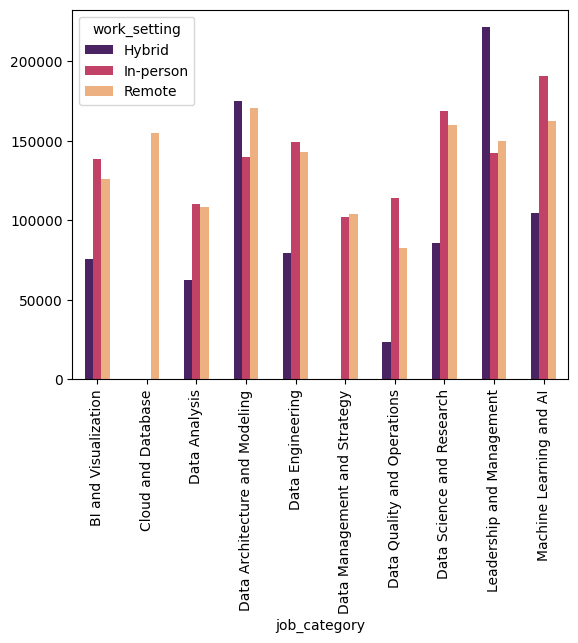

In [60]:
salary_by_category_and_work_setting.plot(kind='bar',colormap='flare_r')
plt.show()

In [61]:
salary_size=df.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean().unstack()
salary_size

company_size,L,M,S
experience_level,,,
Entry-level,78434.952381,93814.210983,71508.044444
Executive,190198.277778,189697.449219,178994.714286
Mid-level,114182.006024,119376.383212,75308.745763
Senior,163240.143791,162660.737182,114544.416667


<Figure size 1200x800 with 0 Axes>

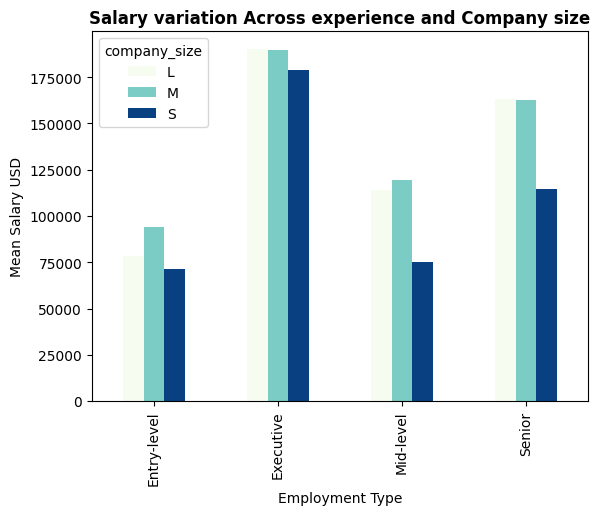

In [62]:
plt.figure(figsize=(12,8))
salary_size.plot(kind='bar',colormap='GnBu')
plt.title('Salary variation Across experience and Company size',fontsize=12,weight='bold')
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary USD')
plt.show()

In [63]:
salary_year=df.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().unstack()
salary_year

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI
work_year,,,,,,,,,,
2020,NaN,NaN,68014.666667,NaN,94575.823529,NaN,NaN,129538.827586,NaN,113276.400000
2021,NaN,NaN,87818.500000,169940.600000,107192.288889,165000.000000,NaN,107517.819444,131892.888889,101396.891892
2022,100875.0,175000.000000,107384.224913,166091.543478,139629.909820,114024.416667,84770.833333,143343.794000,136901.437500,144289.064516
2023,135989.6,141666.666667,109848.584000,153436.043269,149676.242496,99130.062500,105374.906977,170078.135930,147428.229469,187266.857741


In [64]:
df_salary.columns
salary_year.index

Index([2020, 2021, 2022, 2023], dtype='int64', name='work_year')

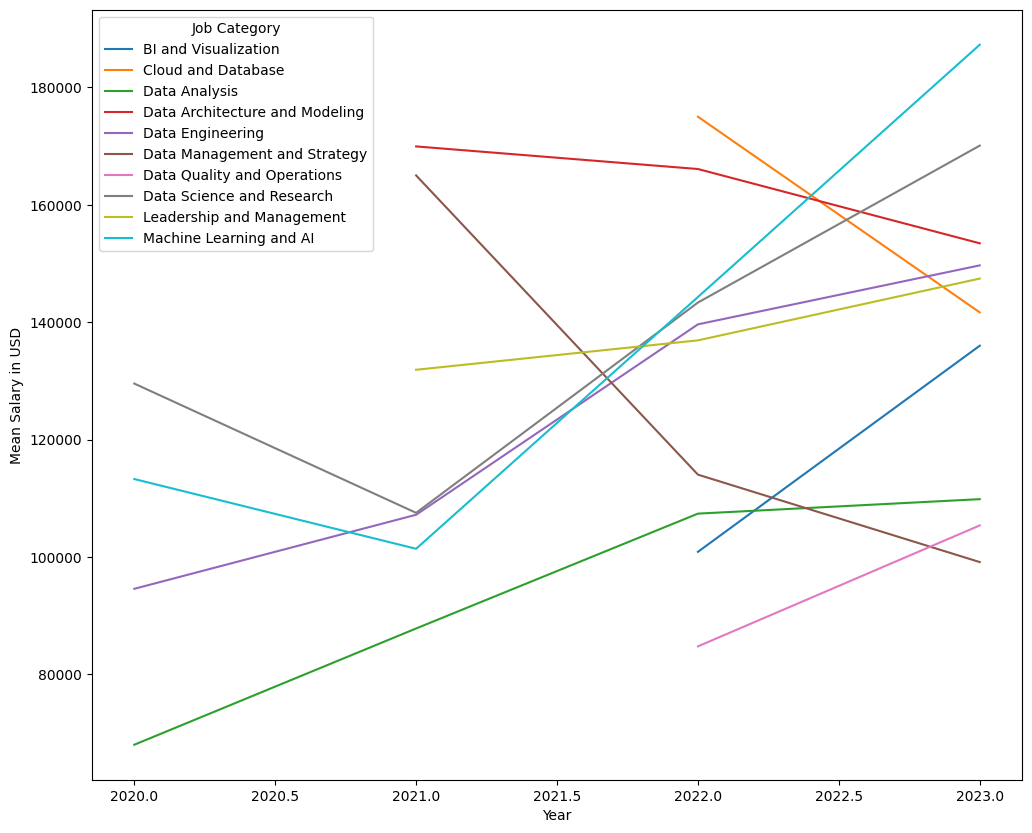

In [65]:
plt.figure(figsize=(12,10))
for i in salary_year.columns:
    plt.plot(salary_year.index,salary_year[i],label=i)
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.legend(title='Job Category',loc='upper left')
plt.show()

In [66]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [73]:
salary_resdt=df[['employee_residence','salary_in_usd']].groupby('employee_residence').median()
salary_resdt = salary_resdt.reset_index()
salary_resdt=salary_resdt.rename(columns={'employee_residence': 'países', 'salary_in_usd': 'igv'})
salary_resdt

,países,igv
0,Algeria,100000.0
1,American Samoa,45555.0
2,Andorra,50745.0
3,Argentina,60000.0
4,Armenia,33500.0
...,...,...
78,United Arab Emirates,115000.0
79,United Kingdom,92280.0
80,United States,150000.0
81,Uzbekistan,100000.0


In [74]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Crear el gráfico inicial
fig = px.choropleth(salary_resdt, locations='países', locationmode='country names', color='igv',
                    color_continuous_scale='Viridis', title='IGV por País')

# Diseñar el diseño de la aplicación
app.layout = html.Div([
    dcc.Graph(id='igv-map', figure=fig),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': país, 'value': país} for país in salary_resdt['países']],
        value=salary_resdt['países'][0],
        multi=False,
        style={'width': '50%'}
    )
])

# Definir una función de retorno de llamada para actualizar el gráfico según la selección del país
@app.callback(
    Output('igv-map', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_map(selected_country):
    filtered_df = salary_resdt[salary_resdt['países'] == selected_country]
    updated_fig = px.choropleth(filtered_df, locations='países', locationmode='country names', color='igv',
                                 color_continuous_scale='Viridis', title=f'IGV para {selected_country}')
    return updated_fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)